# Project 1 - Amazon India Sales Analysis
---

### Analysis:
---

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
amazon_data_path = "data/amazon.csv"

# Read the mouse data and the study results
amazon_data = pd.read_csv(amazon_data_path)

# Display the data table for preview

amazon_data[["category", "full_category"]] = amazon_data["category"].str.split('|',n=1 ,expand=True)

amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,full_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Accessories&Peripherals|Cables&Accessories|Cab...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Accessories&Peripherals|Cables&Accessories|Cab...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Accessories&Peripherals|Cables&Accessories|Cab...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Accessories&Peripherals|Cables&Accessories|Cab...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Accessories&Peripherals|Cables&Accessories|Cab...


In [2]:
amazon_data = amazon_data.dropna()

In [3]:
amazon_data.isnull().sum().sum()

0

In [4]:
amazon_data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'full_category'],
      dtype='object')

# Pricing and Rating Data

In [5]:
pricing_rating_data = amazon_data.loc[:,["product_id", "product_name", "category", "discounted_price", "actual_price", "discount_percentage", 
                                         "rating", "rating_count", "review_id", "review_title", "review_content"]]
pricing_rating_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,"24,269","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,"43,994","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,"7,928","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,"94,363","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,"16,905","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [6]:
# Cleaning Pricing Rating DF

pricing_rating_data["discount_percentage"]=pricing_rating_data["discount_percentage"].str.rstrip('%').astype('float') / 100.0

pricing_rating_data['actual_price'] = pricing_rating_data['actual_price'].str.replace('₹','')
pricing_rating_data['actual_price'] = pricing_rating_data['actual_price'].str.replace(',','')

pricing_rating_data['discounted_price'] = pricing_rating_data['discounted_price'].str.replace('₹','')
pricing_rating_data['discounted_price'] = pricing_rating_data['discounted_price'].str.replace(',','')

pricing_rating_data['discounted_price'] = pricing_rating_data['discounted_price'].astype(float)/83.14
pricing_rating_data['actual_price'] = pricing_rating_data['actual_price'].astype(float)/83.14

pricing_rating_data["rating_count"] = pricing_rating_data["rating_count"].str.replace(',','').astype(int)


In [7]:
# Define a function to create Linear Regression plots
def lrplots(x,y, xlabel, ylabel, coord):

    #LR formulas
    (slope, sint, r, p, std_err)= st.linregress(x,y)
    fit = slope *x + sint
    equation = f" Y = {str(round(slope,2))}x + {str(round(sint,2))}"
    
    #print r value
    print(f"The r-value is: {r}")
    
    #time to plot
    plt.scatter(x, y, marker = 'o', edgecolor ='black')
    plt.plot(x,fit, "r-")
    plt.annotate(equation, coord, color = 'red')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

The r-value is: -0.15485977580549712


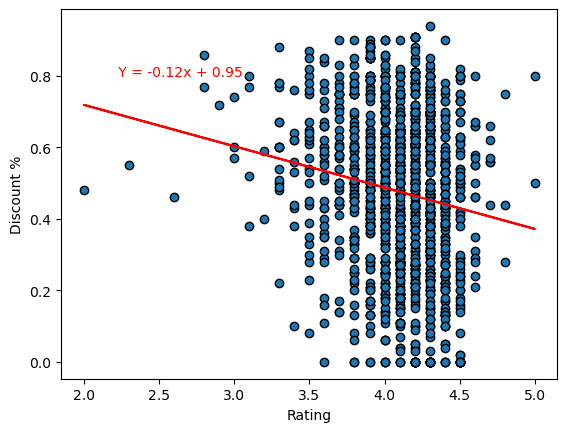

In [8]:
#Discount percentage vs rating scatter

discount = pricing_rating_data["discount_percentage"]

rating = pricing_rating_data["rating"]

lrplots(rating, discount, "Rating", "Discount %", (2.2,.8))

The r-value is: 0.10240109357233647


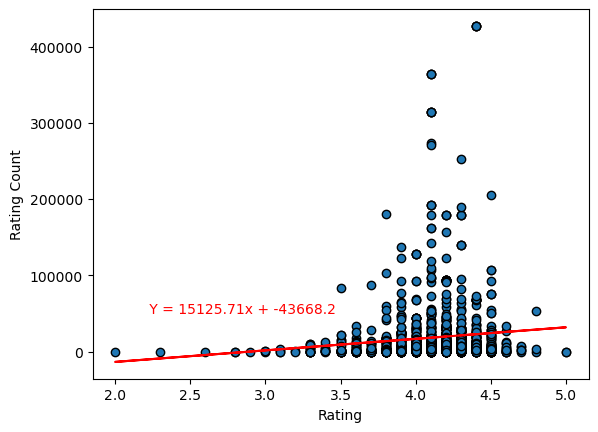

In [9]:
#Rating count vs rating scatter

ratingcount = pricing_rating_data["rating_count"]

rating = pricing_rating_data["rating"]

lrplots(rating, ratingcount, "Rating", "Rating Count", (2.2,50000))

The r-value is: 0.12118077051360485


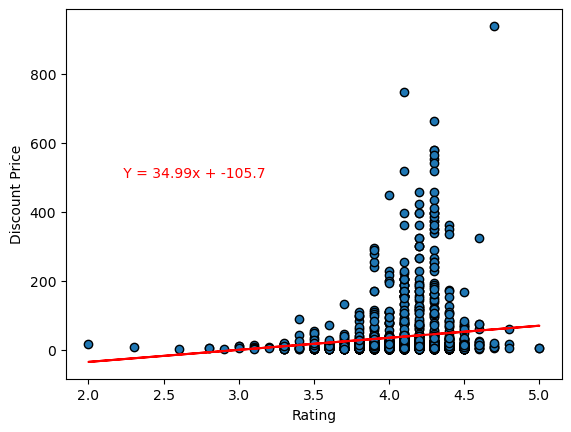

In [10]:
#Discount price vs rating scatter

discountprice = pricing_rating_data["discounted_price"]

rating = pricing_rating_data["rating"]

lrplots(rating, discountprice, "Rating", "Discount Price", (2.2,500))

The r-value is: 0.9619064402460145


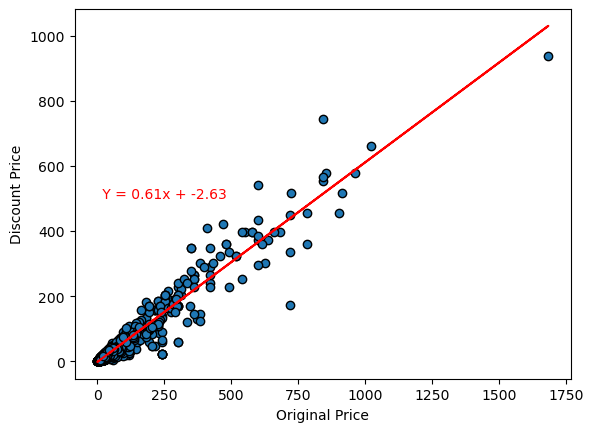

In [11]:
#Discount price vs original price scatter

discountprice = pricing_rating_data["discounted_price"]
originalprice = pricing_rating_data["actual_price"]

lrplots(originalprice, discountprice, "Original Price", "Discount Price", (2.2,500))

The r-value is: -0.11749413051731969


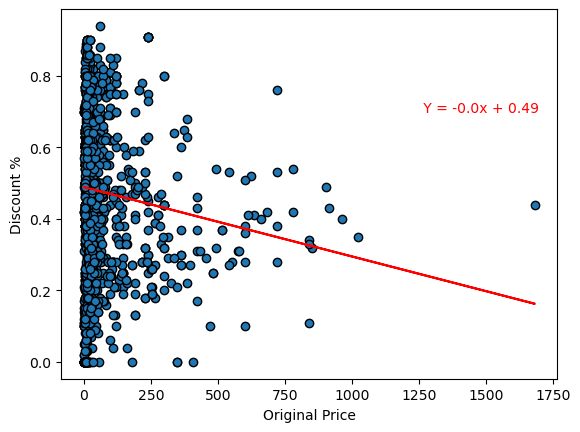

In [12]:
#Discount percentage vs original price scatter


discount = pricing_rating_data["discount_percentage"]
originalprice = pricing_rating_data["actual_price"]

lrplots(originalprice, discount, "Original Price", "Discount %", (1250,.7))

In [33]:
review_data = amazon_data.loc[:,["product_id", "product_name", "rating", "rating_count", "review_id", "review_title", "review_content"]]
review_data.insert(7, "Length of Review", '')
review_data.insert(8,"Length of Product Name", '')
for index, row in review_data.iterrows():
    review_data.loc[index, "Length of Review"] = len(review_data.loc[index,"review_content"])
    
for index, row in review_data.iterrows():
    review_data.loc[index, "Length of Product Name"] = len(review_data.loc[index,"product_name"])

review_data["Length of Review"]= review_data["Length of Review"].astype(float)
review_data["Length of Product Name"]= review_data["Length of Product Name"].astype(float)
review_data.head()

,product_id,product_name,rating,rating_count,review_id,review_title,review_content,Length of Review,Length of Product Name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,269","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,483.0,162.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,"43,994","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,1186.0,193.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,"7,928","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",271.0,136.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,"94,363","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",443.0,199.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,"16,905","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2451.0,110.0


The r-value is: 0.07794718058272823


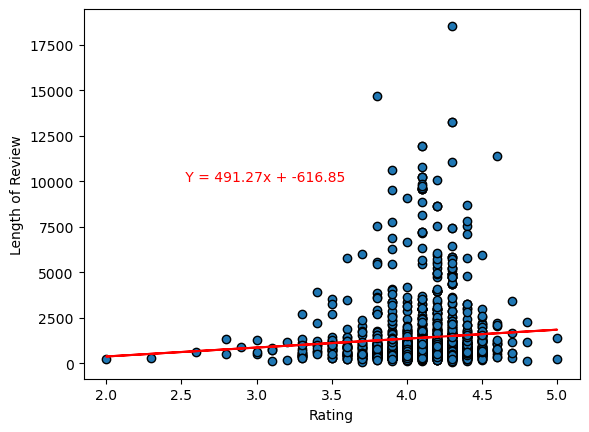

PearsonRResult(statistic=0.07794718058272823, pvalue=0.0028505813032794177)


In [37]:
# Length of review vs rating
length = review_data["Length of Review"]
rating = review_data["rating"]
lrplots(rating, length, "Rating", "Length of Review", (2.5,10000))
print(st.pearsonr(review_data["Length of Review"],review_data["rating"] ))


The r-value is: -0.08543690353602773


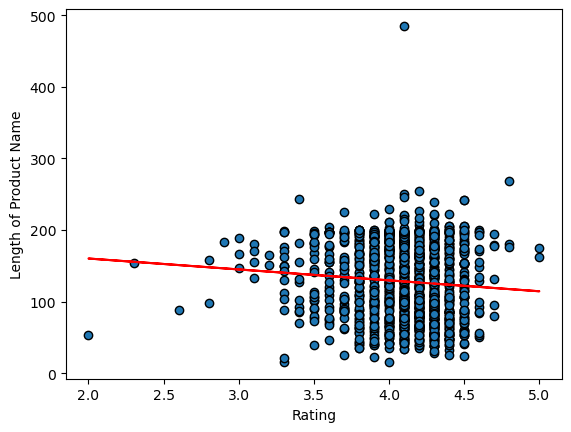

In [34]:
# Length of review vs rating
length = review_data["Length of Product Name"]
rating = review_data["rating"]
lrplots(rating, length, "Rating", "Length of Product Name", (2.5,10000))


In [13]:
category_data = amazon_data.loc[:,["product_id", "product_name", "category", "discounted_price", "actual_price", "discount_percentage", 
                                         "rating", "rating_count", "review_id"]]
category_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_id
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,"24,269","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,"43,994","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,"7,928","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,"94,363","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,"16,905","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R..."


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the ratings.
ratings_data = pricing_rating_data.set_index(["product_id"])

# Use groupby and summary statistical methods to calculate the following properties of each column: 
# mean, median, variance, standard deviation, and SEM.
grouped_ratings_data = ratings_data.groupby("category")
ratings_mean = grouped_ratings_data["rating"].mean()
ratings_median = grouped_ratings_data["rating"].median()
ratings_var = grouped_ratings_data["rating"].var()
ratings_std = grouped_ratings_data["rating"].std()
ratings_sem = grouped_ratings_data["rating"].sem()

# Assemble the resulting series into a single summary DataFrame.
ratings_summary_df  = pd.DataFrame({"Mean Rating":  ratings_mean, "Median Rating":  ratings_median,
                                    "Rating Variance":  ratings_var, "Rating Std. Dev.":  ratings_std,
                                    "Rating Std. Err.":  ratings_sem})
ratings_summary_df